In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
data_directory_pickle = os.path.join('..','data','pickle')
img_directory= os.path.join( '..','images')

dataset = os.path.join(data_directory_pickle,'health_data.pkl')

In [4]:
df = pd.read_pickle(dataset)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44918 entries, 0 to 44917
Data columns (total 9 columns):
business_id        44918 non-null object
review_id          44918 non-null object
health_business    44918 non-null object
name               44918 non-null object
stars              44918 non-null int64
text               44918 non-null object
processed          44918 non-null object
polarity           44918 non-null float64
subjectivity       44918 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


In [6]:
df.head(2)

,business_id,review_id,health_business,name,stars,text,processed,polarity,subjectivity
0,2hpi6pXIFf0taDIYCoNIuw,4ar9LmGU4rQ3vXFj325HCg,urgent care,Healthcare Partner,1,If your aim is to waste hours upon hours of yo...,if your aim is to waste hours upon hours of yo...,-0.062605,0.532773
1,2hpi6pXIFf0taDIYCoNIuw,mZo59NzNBPr9RegkzjIGVA,urgent care,Healthcare Partner,5,Memorial Day Weekend.. I cannot Thank Doctor ...,memorial day weekend i cannot thank doctor shu...,0.281250,0.553125


In [7]:
df.stars.value_counts()

5    21365
1    15753
4     3279
2     2778
3     1743
Name: stars, dtype: int64

In [8]:
df.health_business.value_counts()

hospital              8247
family practice       6869
urgent care           6637
obstetrician          5846
chiropractors         5739
diagnostic service    5011
internal medicine     3577
physical therapy      1818
mental health         1174
Name: health_business, dtype: int64

## combine 1& 2 star values and 5

In [307]:
data = df.ix[np.where((df.stars<=2)|(df.stars==5))]

In [308]:
data.stars.value_counts()

5    21365
1    15753
2     2778
Name: stars, dtype: int64

In [309]:
data['review'] = np.where((data.stars<=2),'bad_review','good_review')

In [310]:
data.review.value_counts()

good_review    21365
bad_review     18531
Name: review, dtype: int64

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39896 entries, 0 to 44917
Data columns (total 11 columns):
business_id        39896 non-null object
review_id          39896 non-null object
health_business    39896 non-null object
name               39896 non-null object
stars              39896 non-null int64
text               39896 non-null object
processed          39896 non-null object
polarity           39896 non-null float64
subjectivity       39896 non-null float64
lemmatize_text     39896 non-null object
review             39896 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 3.7+ MB


In [312]:
data.head(2)

,business_id,review_id,health_business,name,stars,text,processed,polarity,subjectivity,lemmatize_text,review
0,2hpi6pXIFf0taDIYCoNIuw,4ar9LmGU4rQ3vXFj325HCg,urgent care,Healthcare Partner,1,If your aim is to waste hours upon hours of yo...,if your aim is to waste hours upon hours of yo...,-0.062605,0.532773,if your aim be to waste hour upon hour of your...,bad_review
1,2hpi6pXIFf0taDIYCoNIuw,mZo59NzNBPr9RegkzjIGVA,urgent care,Healthcare Partner,5,Memorial Day Weekend.. I cannot Thank Doctor ...,memorial day weekend i cannot thank doctor shu...,0.281250,0.553125,memorial day weekend i can not thank doctor sh...,good_review


# Split data

In [313]:
X1 = data.text  # 
X2 = data.processed
X3 = data.lemmatize_text
y = data.review

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y_s, test_size=0.33, random_state=42)

# import libraries

In [16]:
from __future__ import print_function

from pprint import pprint
import time
import logging

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

##  Define a pipeline combining
## a text feature extractor with a simple classifier



In [18]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),
])

In [20]:
#pipeline.get_params()

## Default Parameters

```JSON
'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': True,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__loss': 'squared_hinge',
 'clf__max_iter': 1000,
 'clf__multi_class': 'ovr',
 'clf__penalty': 'l2',
 'clf__random_state': None,
 'clf__tol': 0.0001,
 'clf__verbose': 0}
 ```

## TEST

In [22]:
parameters = {}  # for test
grid_search = GridSearchCV(pipeline, 
                           parameters, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)
print('--------------------------------')
print("    GRID SEARCH ACTIVE\n\n")
print('--------------------------------')

print("PIPELINE:", [name for name, _ in pipeline.steps])
print("PARAMETERS:")
pprint(parameters)
print('--------------------------------')
t0 = time.time()
start = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())

print('start: {}'.format(start))
print('--------------------------------')
grid_search.fit(X1,y)
end = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())
print('--------------------------------')
print('End: {}'.format(end))
print('--------------------------------')

seconds = time.time() - t0

print("done in %0.3fs" % (seconds))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

--------------------------------
    GRID SEARCH ACTIVE


--------------------------------
PIPELINE: ['vect', 'tfidf', 'clf']
PARAMETERS:
{}
--------------------------------
start: 10/30/2018 20:43:03
--------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.1s finished


--------------------------------
End: 10/30/2018 20:43:57
--------------------------------
done in 54.303s

Best score: 0.959
Best parameters set:


## User parameters

In [24]:
parameters = { 
'vect__ngram_range':( (1, 2),),
'vect__max_df': (0.5, 0.75, 1.0), # 1.0,
'vect__max_features':  (None, 5000, 10000, 50000), # None,
 'clf__C': (1,5,10,15,),
             }

# Cross Validation: 1
- original text
- star value
- time: 12 minutes

In [26]:
#parameters = {}  # for test
grid_search = GridSearchCV(pipeline, 
                           parameters, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)
print('--------------------------------')
print("    GRID SEARCH ACTIVE\n\n")
print('--------------------------------')

print("PIPELINE:", [name for name, _ in pipeline.steps])
print("PARAMETERS:")
pprint(parameters)
print('--------------------------------')
t0 = time.time()
start = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())

print('start: {}'.format(start))
print('--------------------------------')
grid_search.fit(X1,y)
end = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())
print('--------------------------------')
print('End: {}'.format(end))
print('--------------------------------')

seconds = time.time() - t0

print("done in %0.3fs" % (seconds))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

--------------------------------
    GRID SEARCH ACTIVE


--------------------------------
PIPELINE: ['vect', 'tfidf', 'clf']
PARAMETERS:
{'clf__C': (1, 5, 10, 15),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 2),)}
--------------------------------
start: 10/30/2018 20:45:12
--------------------------------
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 13.9min finished


--------------------------------
End: 10/30/2018 20:59:35
--------------------------------
done in 863.204s

Best score: 0.971
Best parameters set:
	clf__C: 5
	vect__max_df: 0.5
	vect__max_features: None
	vect__ngram_range: (1, 2)


## Test Results

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)

In [323]:
#x1 accuracy:   0.976

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.5)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC(C=5)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.976


In [324]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  bad_review       0.97      0.98      0.97      6118
 good_review       0.98      0.97      0.98      7048

   micro avg       0.98      0.98      0.98     13166
   macro avg       0.98      0.98      0.98     13166
weighted avg       0.98      0.98      0.98     13166



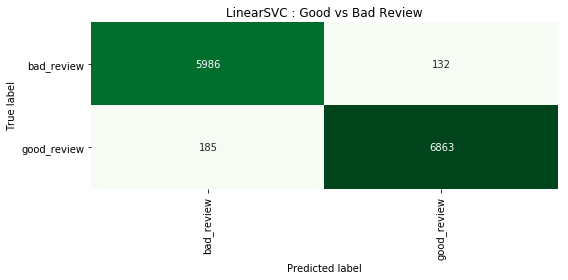

In [31]:
title = 'LinearSVC : Good vs Bad Review'
labels =list(np.unique(y))
cm = confusion_matrix(y_test, pred,labels=labels)
plt.figure(figsize = (8,4))
g = sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens",xticklabels=True,yticklabels=True)
g.set_yticklabels(labels, rotation =0)
g.set_xticklabels(labels, rotation =90)
plt.title(title)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('{}/{}.png'.format(img_directory,title.replace(" ", "_")))
plt.show()

# Cross Validation: 2
- process text
- star value

In [ ]:
parameters = { 
'vect__ngram_range':( (1, 2),),
'vect__max_df': (0.5, 0.75, 1.0), # 1.0,
'vect__max_features':  (None, 5000, 10000, 50000), # None,
 'clf__C': (1,5,10,15,),
             }

In [ ]:
grid_search = GridSearchCV(pipeline, 
                           parameters, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)
print('--------------------------------')
print("    GRID SEARCH ACTIVE\n\n")
print('--------------------------------')

print("PIPELINE:", [name for name, _ in pipeline.steps])
print("PARAMETERS:")
pprint(parameters)
print('--------------------------------')
t0 = time()
print('start:{}'.format(t0))
grid_search.fit(X2,y)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

## Apply results

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5,ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC(C=5)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.976


In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  bad_review       0.97      0.98      0.97      6118
 good_review       0.98      0.97      0.98      7048

   micro avg       0.98      0.98      0.98     13166
   macro avg       0.98      0.98      0.98     13166
weighted avg       0.98      0.98      0.98     13166



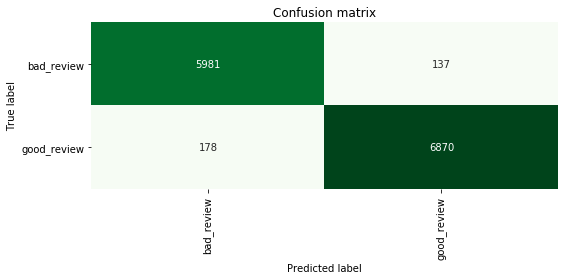

In [37]:
title = 'Confusion matrix'
labels =list(np.unique(y))
cm = confusion_matrix(y_test, pred,labels=labels)
plt.figure(figsize = (8,4))
g = sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens",xticklabels=True,yticklabels=True)
g.set_yticklabels(labels, rotation =0)
g.set_xticklabels(labels, rotation =90)
plt.title(title)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('{}/{}.png'.format(img_directory,title.replace(" ", "_")))
plt.show()

## health_business
## split data

In [38]:
df.health_business.value_counts()

hospital              8247
family practice       6869
urgent care           6637
obstetrician          5846
chiropractors         5739
diagnostic service    5011
internal medicine     3577
physical therapy      1818
mental health         1174
Name: health_business, dtype: int64

In [39]:
X1=df.text 
X2= df.processed
y = df.health_business.values

## Cross Validation: 1

In [40]:
### TEST ###
parameters = {}  # for test
grid_search = GridSearchCV(pipeline, 
                           parameters, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)
print('--------------------------------')
print("    GRID SEARCH ACTIVE\n\n")
print('--------------------------------')

print("PIPELINE:", [name for name, _ in pipeline.steps])
print("PARAMETERS:")
pprint(parameters)
print('--------------------------------')
t0 = time.time()
start = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())

print('start: {}'.format(start))
print('--------------------------------')
grid_search.fit(X1,y)
end = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())
print('--------------------------------')
print('End: {}'.format(end))
print('--------------------------------')

seconds = time.time() - t0

print("done in %0.3fs" % (seconds))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

--------------------------------
    GRID SEARCH ACTIVE


--------------------------------
PIPELINE: ['vect', 'tfidf', 'clf']
PARAMETERS:
{}
--------------------------------
start: 10/30/2018 21:07:54
--------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


--------------------------------
End: 10/30/2018 21:09:08
--------------------------------
done in 74.067s

Best score: 0.602
Best parameters set:


In [41]:
parameters = { 
'vect__ngram_range':( (1, 2),),
'vect__max_df': (0.5, 0.75, 1.0), # 1.0,
'vect__max_features':  (None, 5000, 10000, 50000), # None,
 'clf__C': (1,5,10,15,),
             }

In [42]:
#parameters = {}  # for test
grid_search = GridSearchCV(pipeline, 
                           parameters, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)
print('--------------------------------')
print("    GRID SEARCH ACTIVE\n\n")
print('--------------------------------')

print("PIPELINE:", [name for name, _ in pipeline.steps])
print("PARAMETERS:")
pprint(parameters)
print('--------------------------------')
t0 = time.time()
start = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())

print('start: {}'.format(start))
print('--------------------------------')
grid_search.fit(X1,y)
end = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())
print('--------------------------------')
print('End: {}'.format(end))
print('--------------------------------')

seconds = time.time() - t0

print("done in %0.3fs" % (seconds))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

--------------------------------
    GRID SEARCH ACTIVE


--------------------------------
PIPELINE: ['vect', 'tfidf', 'clf']
PARAMETERS:
{'clf__C': (1, 5, 10, 15),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 2),)}
--------------------------------
start: 10/30/2018 21:09:23
--------------------------------
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 45.2min finished


--------------------------------
End: 10/30/2018 21:55:26
--------------------------------
done in 2763.054s

Best score: 0.623
Best parameters set:
	clf__C: 1
	vect__max_df: 1.0
	vect__max_features: None
	vect__ngram_range: (1, 2)


cvalues
https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a

# Apply Results

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)

In [86]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC(C=2)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.678


In [117]:
# accuracy:   0.678
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2),max_df=0.6)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC(C=2)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.678


In [114]:
# accuracy:   0.678
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2),max_df=0.55)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC(C=2)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.678


In [115]:
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

     chiropractors       0.86      0.88      0.87      1882
diagnostic service       0.66      0.70      0.68      1625
   family practice       0.55      0.60      0.58      2233
          hospital       0.61      0.63      0.62      2715
 internal medicine       0.75      0.74      0.74      1195
     mental health       0.89      0.53      0.67       374
      obstetrician       0.76      0.75      0.76      1950
  physical therapy       0.80      0.54      0.64       586
       urgent care       0.59      0.60      0.60      2263

         micro avg       0.68      0.68      0.68     14823
         macro avg       0.72      0.66      0.68     14823
      weighted avg       0.68      0.68      0.68     14823



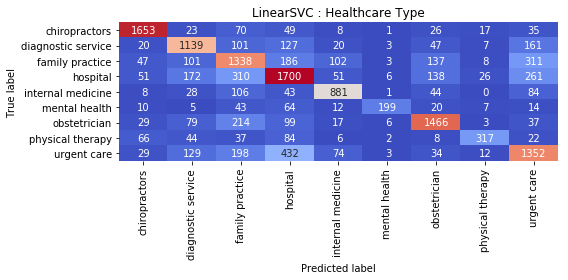

In [116]:
title = 'LinearSVC : Healthcare Type'
labels =list(np.unique(y))
cm = confusion_matrix(y_test, pred,labels=labels)
plt.figure(figsize = (8,4))
g = sns.heatmap(cm, annot=True, cbar=False, cmap="coolwarm",fmt='2',xticklabels=True,yticklabels=True)
g.set_yticklabels(labels, rotation =0)
g.set_xticklabels(labels, rotation =90)
plt.title(title)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('{}/{}.png'.format(img_directory,title.replace(" ", "_")))

plt.show()

In [99]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())
sorted_coef_index = svc_tfidf_clf.coef_[0].argsort()

In [100]:
print('Highest 10  Coef:')
print('----------------')
for i in feature_names[sorted_coef_index][-10:]:
    print('- {}'.format(i))

Highest 10  Coef:
----------------
- neck
- chiro
- joint
- massage
- adjusted
- adjustments
- chiropractors
- adjustment
- chiropractic
- chiropractor


In [101]:
print('Lowest 10  Coef:')
print('----------------')
for i in feature_names[sorted_coef_index][:10]:
    print('- {}'.format(i))

Lowest 10  Coef:
----------------
- nurse
- er
- hospital
- sick
- blood
- nurses
- kids
- urgent
- staff
- therapy


# Cross Validation: 2

In [ ]:
parameters = { 
'vect__ngram_range':( (1, 2),),
'vect__max_df': (0.5, 0.75, 1.0), # 1.0,
'vect__max_features':  (None, 5000, 10000, 50000), # None,
 'clf__C': (1,5,10,15,),
             }

In [ ]:
#parameters = {}  # for test
grid_search = GridSearchCV(pipeline, 
                           parameters, 
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)
print('--------------------------------')
print("    GRID SEARCH ACTIVE\n\n")
print('--------------------------------')

print("PIPELINE:", [name for name, _ in pipeline.steps])
print("PARAMETERS:")
pprint(parameters)
print('--------------------------------')
t0 = time.time()
start = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())

print('start: {}'.format(start))
print('--------------------------------')
grid_search.fit(X2,y)
end = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime())
print('--------------------------------')
print('End: {}'.format(end))
print('--------------------------------')

seconds = time.time() - t0

print("done in %0.3fs" % (seconds))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [139]:
import spacy
nlp = spacy.load('en_core_web_lg', parse = True, tag=True, entity=True)
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [140]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

In [144]:
%%time
df['lemmatize_text'] = df['processed'].apply(lemmatize_text)

CPU times: user 3h 42min 44s, sys: 23min 36s, total: 4h 6min 21s
Wall time: 30min 48s


In [145]:
df.head()

,business_id,review_id,health_business,name,stars,text,processed,polarity,subjectivity,lemmatize_text
0,2hpi6pXIFf0taDIYCoNIuw,4ar9LmGU4rQ3vXFj325HCg,urgent care,Healthcare Partner,1,If your aim is to waste hours upon hours of yo...,if your aim is to waste hours upon hours of yo...,-0.062605,0.532773,if your aim be to waste hour upon hour of your...
1,2hpi6pXIFf0taDIYCoNIuw,mZo59NzNBPr9RegkzjIGVA,urgent care,Healthcare Partner,5,Memorial Day Weekend.. I cannot Thank Doctor ...,memorial day weekend i cannot thank doctor shu...,0.281250,0.553125,memorial day weekend i can not thank doctor sh...
2,2hpi6pXIFf0taDIYCoNIuw,5wf0Y31knIyBcbS7ZKrW9Q,urgent care,Healthcare Partner,5,This is not my primary doctor and I was pleasa...,this is not my primary doctor and i was pleasa...,0.273214,0.619643,this be not my primary doctor and i be pleasan...
3,2hpi6pXIFf0taDIYCoNIuw,pNVZVifb7FHtr7xMAbLZ4Q,urgent care,Healthcare Partner,5,Went there the first time for myself and was n...,went there the first time for myself and was n...,0.178750,0.502083,go there the first time for myself and be not ...
4,2hpi6pXIFf0taDIYCoNIuw,OfFzPtU9N0ooeQbIg6yR-g,urgent care,Healthcare Partner,1,Terrible assistance. I was there to see a rash...,terrible assistance i was there to see a rash ...,-0.325000,0.825000,terrible assistance i be there to see a rash a...


In [258]:
X1=df.text 
X2= df.lemmatize_text
X3 = df.processed
y = df.health_business.values

## Apply Results

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

In [156]:
# accuracy:   0.678
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2),max_df=0.5)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC(C=1)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.674


In [157]:
# accuracy:   0.678
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,3),max_df=0.5)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC(C=1)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.670


In [300]:
# accuracy:   0.678
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

svc_tfidf_clf = LinearSVC(C=1)
svc_tfidf_clf.fit(tfidf_train, y_train)
pred = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.675


In [296]:
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

     chiropractors       0.86      0.88      0.87      1882
diagnostic service       0.66      0.70      0.68      1625
   family practice       0.56      0.61      0.58      2233
          hospital       0.61      0.63      0.62      2715
 internal medicine       0.75      0.73      0.74      1195
     mental health       0.89      0.50      0.64       374
      obstetrician       0.75      0.75      0.75      1950
  physical therapy       0.80      0.52      0.63       586
       urgent care       0.60      0.60      0.60      2263

         micro avg       0.68      0.68      0.68     14823
         macro avg       0.72      0.66      0.68     14823
      weighted avg       0.68      0.68      0.68     14823



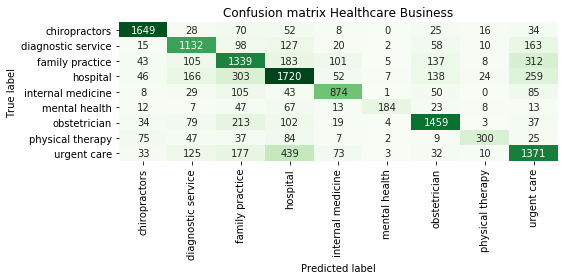

In [279]:
title = 'Confusion matrix Healthcare Business'
labels =list(np.unique(y))
cm = confusion_matrix(y_test, pred,labels=labels)
plt.figure(figsize = (8,4))
g = sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Greens",xticklabels=True,yticklabels=True)
g.set_yticklabels(labels, rotation =0)
g.set_xticklabels(labels, rotation =90)
plt.title(title)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('{}/{}.png'.format(img_directory,title.replace(" ", "_")))
plt.show()

In [280]:
feature_names = tfidf_vectorizer.get_feature_names()
coefs = svc_tfidf_clf.coef_
intercept = svc_tfidf_clf.intercept_
coefs_w_fns = sorted(zip(svc_tfidf_clf.coef_[0],feature_names))
n=10
top_n_coefs = zip(coefs_w_fns[:n], coefs_w_fns[:-(n+1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top_n_coefs:
    print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1,fn_1,coef_2, fn_2))

	-1.9633	nurse          		8.2541	chiropractor   
	-1.9153	hospital       		7.8387	chiropractic   
	-1.8828	er             		5.9000	adjustment     
	-1.5391	nurses         		5.0733	chiropractors  
	-1.4961	blood          		4.6141	adjustments    
	-1.4612	sick           		4.4721	adjusted       
	-1.3879	therapy        		4.2427	massage        
	-1.3789	urgent         		4.0407	joint          
	-1.3477	staff          		3.2443	chiro          
	-1.3410	kids           		3.1926	neck           


In [129]:
feature_names = tfidf_vectorizer.get_feature_names()
coefs = svc_tfidf_clf.coef_
intercept = svc_tfidf_clf.intercept_
coefs_w_fns = sorted(zip(svc_tfidf_clf.coef_[0],feature_names))
n=10
top_n_coefs = zip(coefs_w_fns[:n], coefs_w_fns[:-(n+1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top_n_coefs:
    print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1,fn_1,coef_2, fn_2))

	-1.9687	nurse          		8.2551	chiropractor   
	-1.8805	hospital       		7.8265	chiropractic   
	-1.8647	er             		5.9063	adjustment     
	-1.5226	nurses         		5.0821	chiropractors  
	-1.4942	sick           		4.6082	adjustments    
	-1.4866	blood          		4.4855	adjusted       
	-1.3762	staff          		4.2552	massage        
	-1.3648	kids           		4.0474	joint          
	-1.3644	urgent         		3.2636	chiro          
	-1.3304	therapy        		3.1940	neck           


In [131]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())
sorted_coef_index = svc_tfidf_clf.coef_[0].argsort()

In [132]:
print('Lowest 10 Coef:')
for i in feature_names[sorted_coef_index][:10]:
    print (i)

Lowest 10 Coef:
nurse
hospital
er
nurses
sick
blood
staff
kids
urgent
therapy


In [133]:
print('Highest 10 Coef:')
for i in feature_names[sorted_coef_index][-10:]:
    print (i)

Highest 10 Coef:
neck
chiro
joint
massage
adjusted
adjustments
chiropractors
adjustment
chiropractic
chiropractor
